<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANÁLISIS DE COTIZACIONES EN BOLSA - ACCIONES DE ARGOS</h2></center>

<span style="color: #03396c;">**Integrantes:**</span>
- Cesar Prieto
- Gabriel Peña
- Sebastian Gil

<h2 style="color: #03396c;">INTRODUCCION</h2>

La base de datos fue tomada de la pagina _https://es.investing.com/equities/grupoargos-historical-data_ la cual proporciona estos datos de manera gratuita al publico, la inspiracion para desarrollar este trabajo con esta base es conocer como se comportan los metodos aprendidos en clase en un enfoque econocimo y sobre todo en el area de las acciones, con lo cual decidimos tomar los datos de un grupo empresarial Colombiano y realizar el analisis correspondiente para desarrollar el proyecto para la clase de series de tiempo. 

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Acciones <span style="color: #03396c;">**DIARIAS**</span> del Grupo ARGOS
- 3401 Datos tomado (Desde el 7/11/20114 Hasta 28/02/2024)
- Variables: Fecha, Último, <span style="color: #03396c;">**_Apertura_**</span>, Máximo, Mínimo, Vol, %Var.

In [1]:
# Color2  <span style="color: #03396c;"></span>

<h2 style="color: #03396c;">DESARROLLO</h2>

Paquetes necesarios para el desarrollo del problema

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

In [32]:
# Ruta del archivo CSV
archivo_csv = r'C:\Users\HP\OneDrive\Documentos\DOCUMENTOS PERSONAJES\CESAR\Series\Pro_Series\Series-de-Tiempo\Datos\G_ARGOS.csv'

# Cargar el archivo CSV en un DataFrame de pandas
ARGOS = pd.read_csv(archivo_csv, sep=';')

In [33]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Fecha     3401 non-null   object
 1   Último    3401 non-null   object
 2   Apertura  3401 non-null   object
 3   Máximo    3401 non-null   object
 4   Mínimo    3401 non-null   object
 5   Vol.      3401 non-null   object
 6   % var.    3401 non-null   object
dtypes: object(7)
memory usage: 186.1+ KB
           Fecha     Último   Apertura     Máximo     Mínimo     Vol.  % var.
0     28/02/2024  13.840,00  13.360,00  13.840,00  13.360,00  173,30K   2,37%
1     27/02/2024  13.520,00  13.600,00  13.600,00  13.480,00   85,25K   0,00%
2     26/02/2024  13.520,00  13.280,00  13.560,00  13.280,00   53,98K  -0,44%
3     25/02/2024  13.580,00  13.020,00  13.600,00  13.000,00  397,70K   2,41%
4     24/02/2024  13.260,00  13.000,00  13.260,00  13.000,00   51,67K   2,31%
...          ...        ...        ...    

In [34]:
# Convertir la columna de fecha al formato de fecha
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

# Convertir las comas en los puntos en las columnas numéricas
columnas_numericas = ['Último', 'Apertura', 'Máximo', 'Mínimo']
# Eliminar los puntos de los números antes de convertirlos a float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace('\,', '.', regex=True)
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace('\.', '', regex=True)

# Convertir las columnas numéricas al tipo float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].astype(float)

# Dividir entre 1000 para eliminar los ceros adicionales
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].div(100000)

# Reordenar el DataFrame por fecha de la más antigua a la más reciente
ARGOS = ARGOS.sort_values(by='Fecha')

# Reiniciar el índice
ARGOS = ARGOS.reset_index(drop=True)

In [35]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3401 non-null   datetime64[ns]
 1   Último    3401 non-null   float64       
 2   Apertura  3401 non-null   float64       
 3   Máximo    3401 non-null   float64       
 4   Mínimo    3401 non-null   float64       
 5   Vol.      3401 non-null   object        
 6   % var.    3401 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 186.1+ KB
          Fecha  Último  Apertura  Máximo  Mínimo     Vol.  % var.
0    2014-11-07   19.98     19.90   19.98   19.88   59,52K   0,00%
1    2014-11-08   19.98     19.96   20.00   19.88  124,71K   0,00%
2    2014-11-09   19.60     19.80   19.80   19.60  901,59K  -1,90%
3    2014-11-10   18.98     19.50   19.50   18.98  704,07K  -3,16%
4    2014-11-11   18.80     19.00   19.00   18.64  449,45K  -0,95%
...  

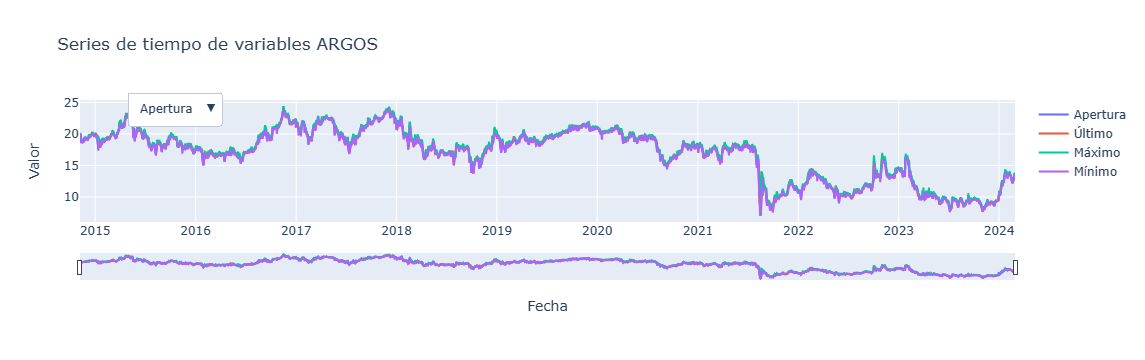

In [37]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Último'], mode='lines', name='Último'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Máximo'], mode='lines', name='Máximo'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Mínimo'], mode='lines', name='Mínimo'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Apertura",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Serie de tiempo variable Apertura"}]),
                dict(label="Último",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Serie de tiempo variable Último"}]),
                dict(label="Máximo",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Serie de tiempo variable Máximo"}]),
                dict(label="Mínimo",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Serie de tiempo variable Mínimo"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables ARGOS')

# Mostrar el gráfico
fig.show()

In [8]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]

# Visualizar las primeras filas de la serie
print(Serie.head())

# Resumen estadístico de la serie
print(Serie.describe())

       Fecha  Apertura
0 2014-11-07     19.90
1 2014-11-08     19.96
2 2014-11-09     19.80
3 2014-11-10     19.50
4 2014-11-11     19.00
                               Fecha     Apertura
count                           3401  3401.000000
mean   2019-07-03 23:59:59.999999744    16.919274
min              2014-11-07 00:00:00     7.100000
25%              2017-03-06 00:00:00    13.930000
50%              2019-07-04 00:00:00    17.980000
75%              2021-10-31 00:00:00    19.720000
max              2024-02-28 00:00:00    24.400000
std                              NaN     3.987770


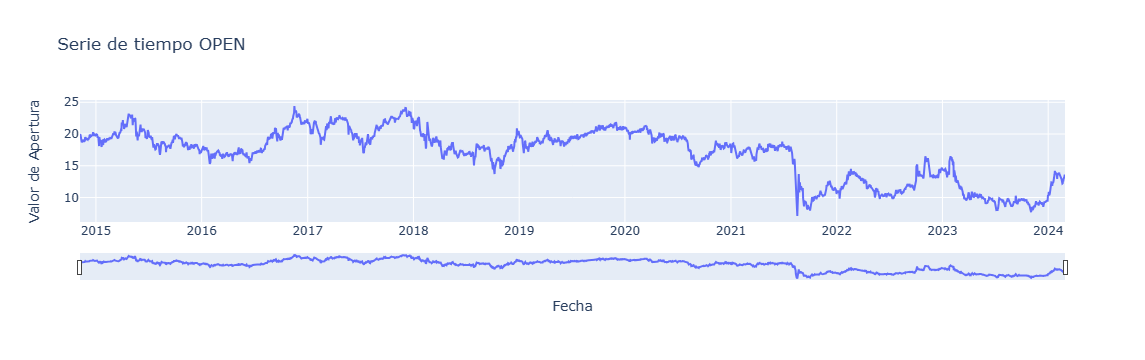

In [40]:
# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

import plotly.graph_objects as go
import pandas as pd

# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo al gráfico
fig.add_trace(go.Scatter(x=Apertura.index, y=Apertura.values, mode='lines'))

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor de Apertura')

# Actualizar el título del gráfico
fig.update_layout(title='Serie de tiempo OPEN')

# Mostrar el gráfico
fig.show()

In [41]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(ARGOS['Apertura'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Apertura, lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 2.1723466235235915
[304.77160462 306.77434326 301.44940865 ... 126.3184058  133.04859268
 127.9833468 ]


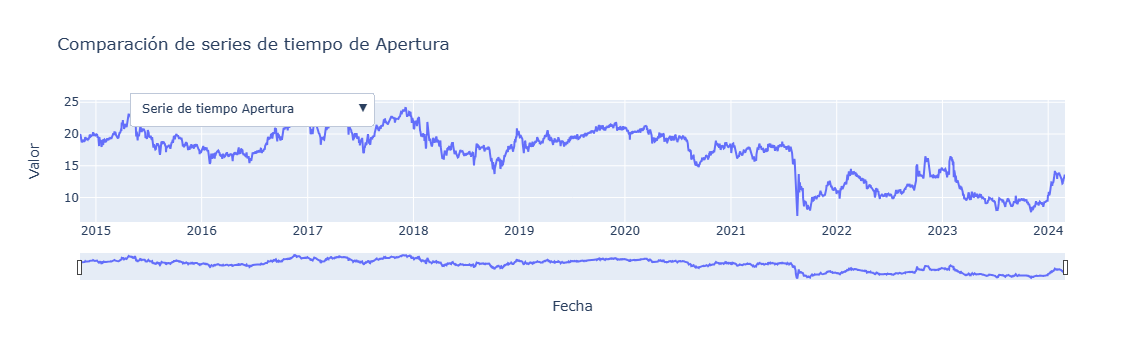

In [43]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Serie de tiempo Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_boxcox, mode='lines', name='Serie de tiempo Apertura-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo Apertura"}]),
                dict(label="Serie de tiempo Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Apertura-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Apertura')

# Mostrar el gráfico
fig.show()

In [44]:
# Calcular el lambda óptimo para la transformación logarítmica
optimal_lambda_log = np.argmax(np.abs(np.diff(np.log(Apertura))))
print("Lambda óptimo para transformación logarítmica:", optimal_lambda_log)

# Aplicar la transformación logarítmica a la serie de tiempo de Apertura
serie_log_apertura = np.log(Apertura)

Lambda óptimo para transformación logarítmica: 2477


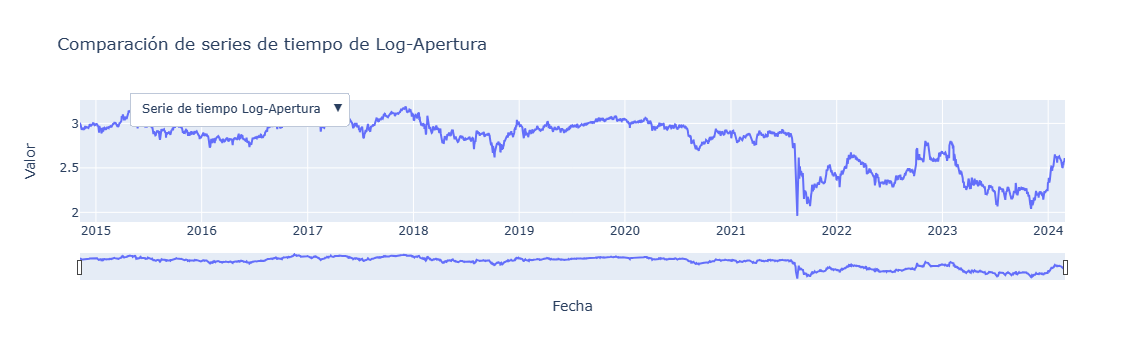

In [45]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_log_apertura, mode='lines', name='Serie de tiempo Log-Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=Apertura, mode='lines', name='Serie de tiempo Apertura', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Log-Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo Log-Apertura"}]),
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Apertura"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Log-Apertura')

# Mostrar el gráfico
fig.show()

In [46]:
import statsmodels.api as sm

# Estimación de la tendencia utilizando lm (regresión lineal) para datos originales
X_original = sm.add_constant(np.arange(len(ARGOS["Apertura"])))  # Añadir una columna de unos para intercepto
fit_Apertura_original = sm.OLS(ARGOS["Apertura"], X_original).fit()

# Imprimir resumen del modelo para datos originales
print(fit_Apertura_original.summary())

                            OLS Regression Results                            
Dep. Variable:               Apertura   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     3938.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:06:34   Log-Likelihood:                -8221.3
No. Observations:                3401   AIC:                         1.645e+04
Df Residuals:                    3399   BIC:                         1.646e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.9772      0.093    236.116      0.0

In [47]:
# Modelo en escala log para los datos en escala logarítmica
log_original_data = np.log(ARGOS["Apertura"])
X_log = sm.add_constant(np.arange(len(log_original_data)))  # Añadir una columna de unos para intercepto
fit_logApertura_log = sm.OLS(log_original_data, X_log).fit()

# Imprimir resumen del modelo en escala log para los datos en escala logarítmica
print(fit_logApertura_log.summary())

                            OLS Regression Results                            
Dep. Variable:               Apertura   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     3995.
Date:                Sat, 06 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:06:37   Log-Likelihood:                 952.38
No. Observations:                3401   AIC:                            -1901.
Df Residuals:                    3399   BIC:                            -1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1386      0.006    500.416      0.0

In [48]:
original_data = ARGOS["Apertura"]

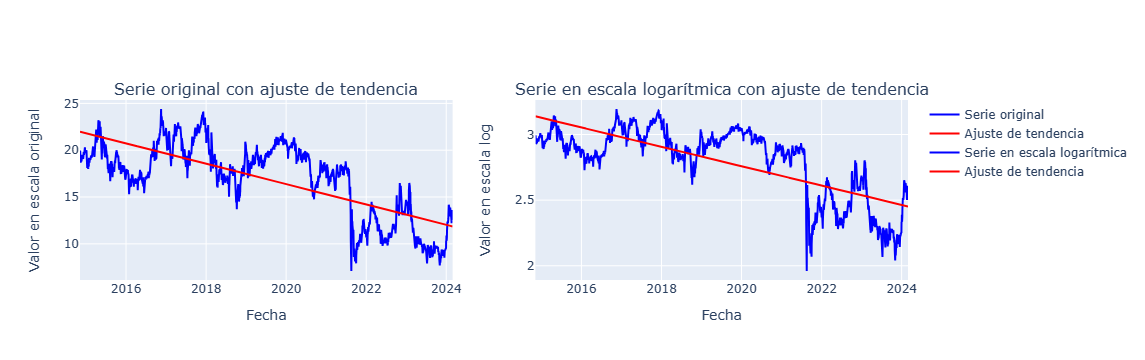

In [51]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Crear subgráficos con make_subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Serie original con ajuste de tendencia', 'Serie en escala logarítmica con ajuste de tendencia'))

# Agregar trazas al primer panel
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=original_data, mode='lines', name='Serie original', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=fit_Apertura_original.fittedvalues, mode='lines', name='Ajuste de tendencia', line=dict(color='red')), row=1, col=1)

# Agregar trazas al segundo panel
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=log_original_data, mode='lines', name='Serie en escala logarítmica', line=dict(color='blue')), row=1, col=2)
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=fit_logApertura_log.fittedvalues, mode='lines', name='Ajuste de tendencia', line=dict(color='red')), row=1, col=2)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', row=1, col=1)
fig.update_xaxes(title_text='Fecha', row=1, col=2)

# Actualizar el diseño del eje y para el primer panel
fig.update_yaxes(title_text='Valor en escala original', row=1, col=1)

# Actualizar el diseño del eje y para el segundo panel
fig.update_yaxes(title_text='Valor en escala log', row=1, col=2)

# Mostrar el gráfico
fig.show()

In [61]:
# Eliminamos la tendencia de la serie original
Apertura_sin_tendencia = original_data - fit_Apertura_original.fittedvalues

# Eliminamos la tendencia de la serie en escala logarítmica
logApertura_sin_tendencia = log_original_data - fit_logApertura_log.fittedvalues

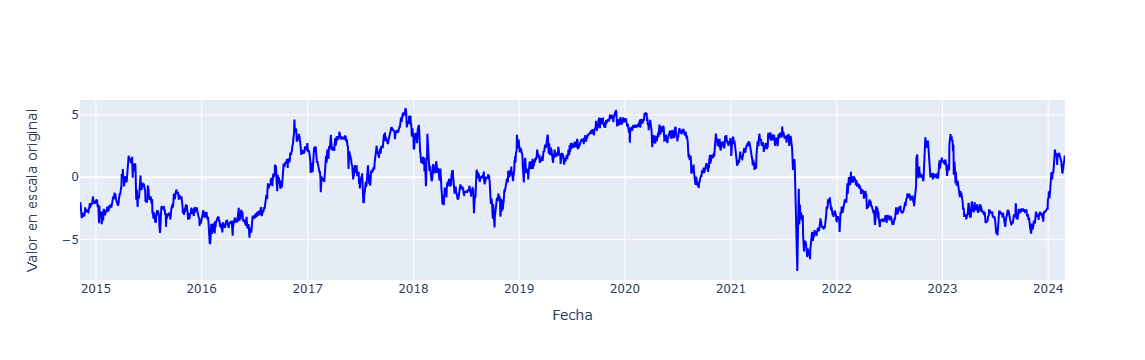

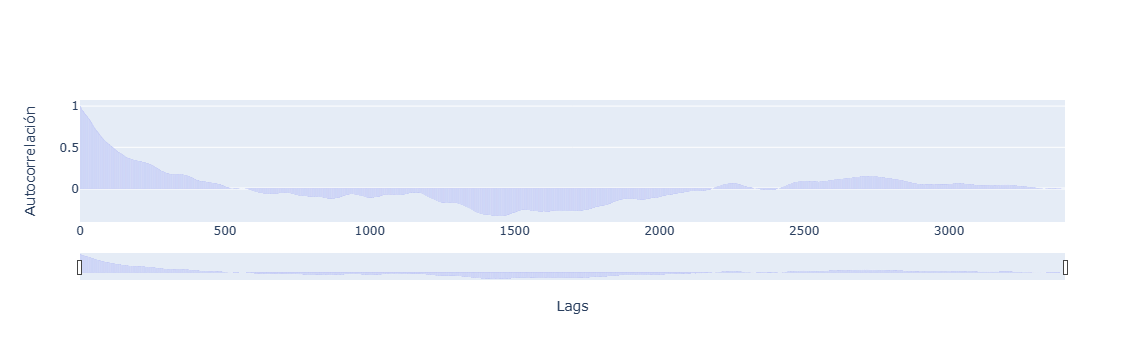

In [71]:
import plotly.subplots as sp
import plotly.graph_objects as go
import pandas as pd
import statsmodels.api as sm

# Calcular autocorrelaciones para la serie en escala original
autocorrelation_original = sm.tsa.acf(Apertura_sin_tendencia, nlags=len(Apertura_sin_tendencia)-1)

# Crear una figura de Plotly para la serie en escala original
fig_original = go.Figure()

# Agregar la serie en escala original
fig_original.add_trace(go.Scatter(x=ARGOS['Fecha'], y=Apertura_sin_tendencia, mode='lines', name='Serie en escala original', line=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_original.update_xaxes(title_text='Fecha')
fig_original.update_yaxes(title_text='Valor en escala original')

# Mostrar la serie en escala original
fig_original.show()

# Crear una figura de Plotly para el autocorrelograma en escala original
fig_autocorrelation_original = go.Figure()

# Agregar el autocorrelograma en escala original
fig_autocorrelation_original.add_trace(go.Bar(x=list(range(len(Apertura_sin_tendencia))), y=autocorrelation_original, name='Autocorrelograma en escala original', marker=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_autocorrelation_original.update_xaxes(title_text='Lags')
fig_autocorrelation_original.update_yaxes(title_text='Autocorrelación')

# Agregar Range Slider para seleccionar un rango de lags
fig_autocorrelation_original.update_layout(
    xaxis=dict(title='Lags', rangeslider=dict(visible=True), type='linear')
)

# Mostrar el autocorrelograma en escala original
fig_autocorrelation_original.show()

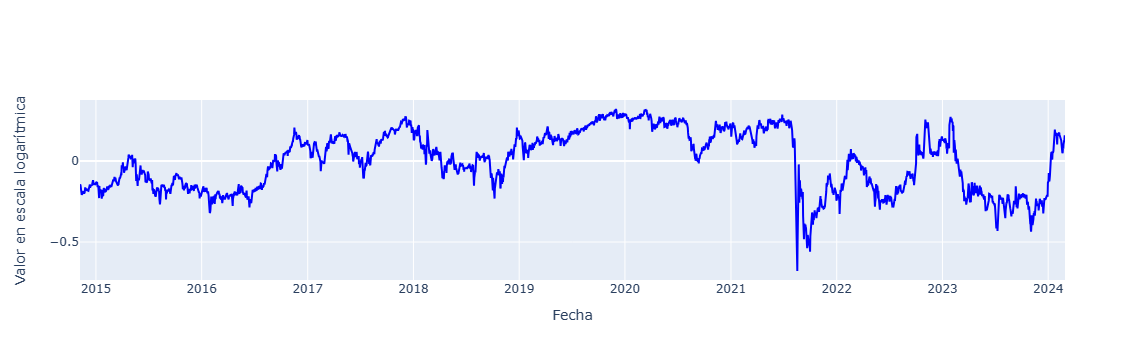

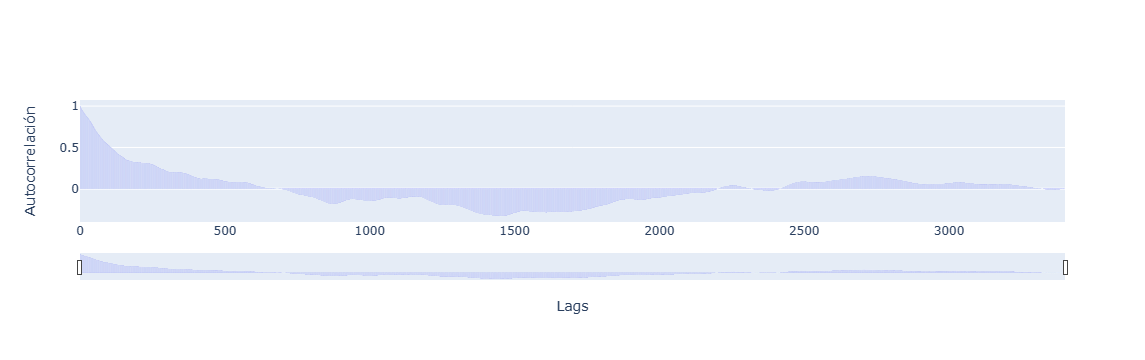

In [72]:
import plotly.graph_objects as go
import statsmodels.api as sm

# Calcular autocorrelaciones para la serie en escala logarítmica
autocorrelation_log = sm.tsa.acf(logApertura_sin_tendencia, nlags=len(logApertura_sin_tendencia)-1)

# Crear una figura de Plotly para la serie en escala logarítmica
fig_log = go.Figure()

# Agregar la serie en escala logarítmica
fig_log.add_trace(go.Scatter(x=ARGOS['Fecha'], y=logApertura_sin_tendencia, mode='lines', name='Serie en escala logarítmica', line=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_log.update_xaxes(title_text='Fecha')
fig_log.update_yaxes(title_text='Valor en escala logarítmica')

# Mostrar la serie en escala logarítmica
fig_log.show()

# Crear una figura de Plotly para el autocorrelograma en escala logarítmica
fig_autocorrelation_log = go.Figure()

# Agregar el autocorrelograma en escala logarítmica
fig_autocorrelation_log.add_trace(go.Bar(x=list(range(len(logApertura_sin_tendencia))), y=autocorrelation_log, name='Autocorrelograma en escala logarítmica', marker=dict(color='blue')))

# Actualizar el diseño del eje x y y
fig_autocorrelation_log.update_xaxes(title_text='Lags')
fig_autocorrelation_log.update_yaxes(title_text='Autocorrelación')

# Agregar Range Slider para seleccionar un rango de lags
fig_autocorrelation_log.update_layout(
    xaxis=dict(title='Lags', rangeslider=dict(visible=True), type='linear')
)

# Mostrar el autocorrelograma en escala logarítmica
fig_autocorrelation_log.show()

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Asegurarse de que 'Fecha' sea del tipo datetime
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'])

# Establecer 'Fecha' como índice
ARGOS.set_index('Fecha', inplace=True)
# Aplicar la descomposición de series temporales
result_original = seasonal_decompose(ARGOS['Apertura'], model='additive')
result_log = seasonal_decompose(np.log(ARGOS['Apertura']), model='additive')

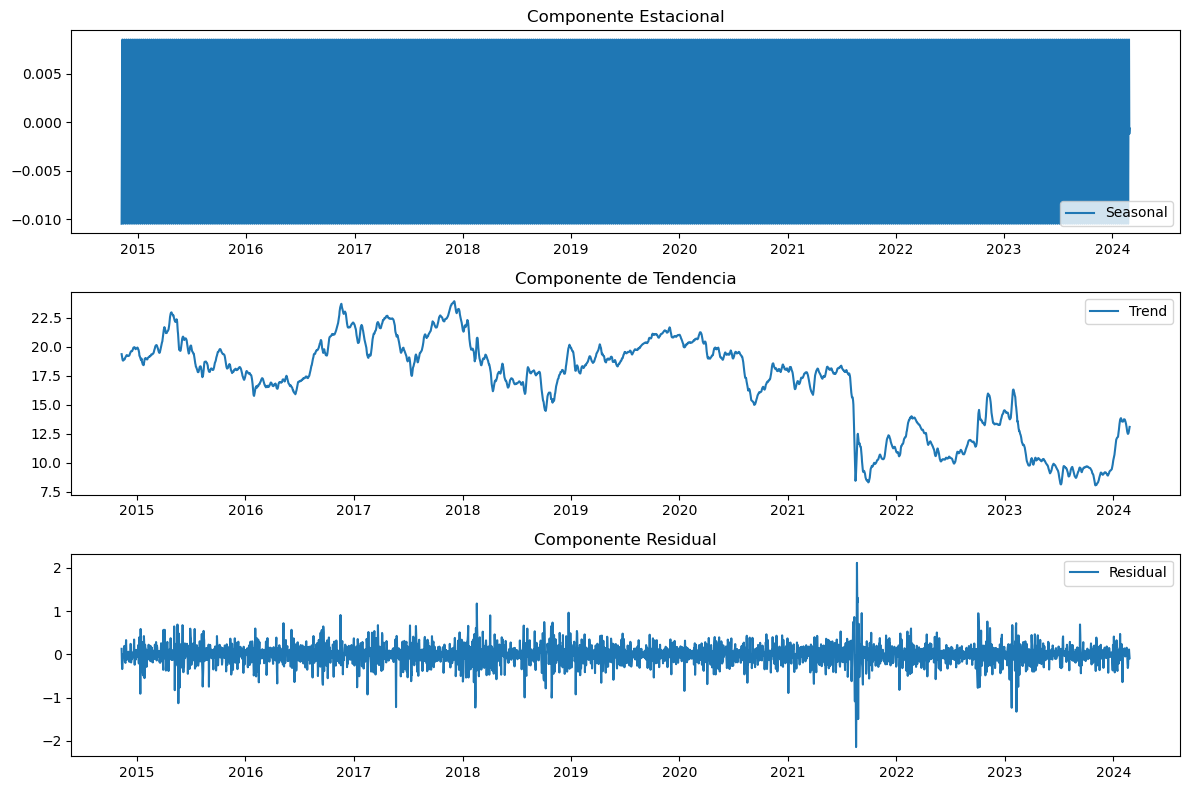

In [21]:
import matplotlib.pyplot as plt

# Graficar la descomposición de la serie original
plt.figure(figsize=(12, 8))

# Subgráfico para el componente estacional
plt.subplot(3, 1, 1)
plt.plot(result_original.seasonal, label='Seasonal')
plt.title('Componente Estacional')
plt.legend()

# Subgráfico para el componente de tendencia
plt.subplot(3, 1, 2)
plt.plot(result_original.trend, label='Trend')
plt.title('Componente de Tendencia')
plt.legend()

# Subgráfico para el componente residual
plt.subplot(3, 1, 3)
plt.plot(result_original.resid, label='Residual')
plt.title('Componente Residual')
plt.legend()

plt.tight_layout()
plt.show()


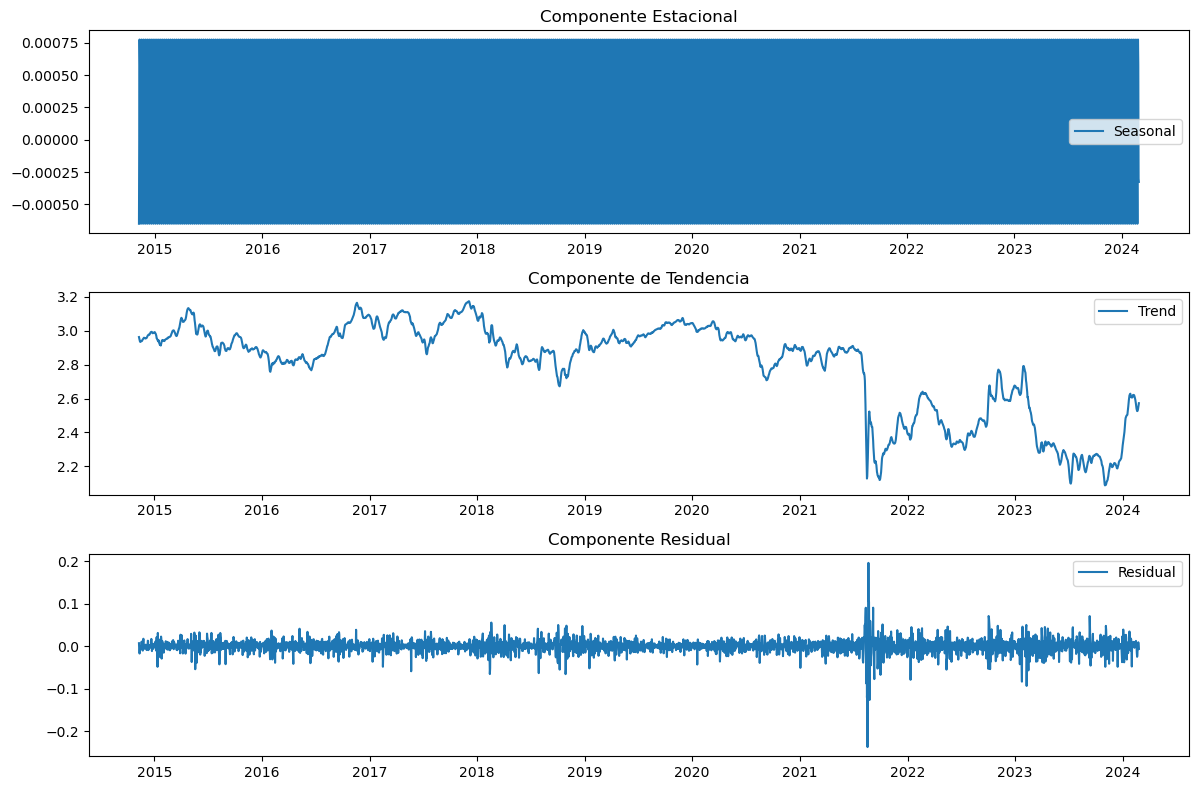

In [22]:
import matplotlib.pyplot as plt

# Graficar la descomposición de la serie original
plt.figure(figsize=(12, 8))

# Subgráfico para el componente estacional
plt.subplot(3, 1, 1)
plt.plot(result_log.seasonal, label='Seasonal')
plt.title('Componente Estacional')
plt.legend()

# Subgráfico para el componente de tendencia
plt.subplot(3, 1, 2)
plt.plot(result_log.trend, label='Trend')
plt.title('Componente de Tendencia')
plt.legend()

# Subgráfico para el componente residual
plt.subplot(3, 1, 3)
plt.plot(result_log.resid, label='Residual')
plt.title('Componente Residual')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
from statsmodels.tsa.seasonal import STL
import pandas as pd
import matplotlib.pyplot as plt

# Ajuste STL a la serie original
stl_result_original = STL(ARGOS['Apertura'], seasonal=13).fit()

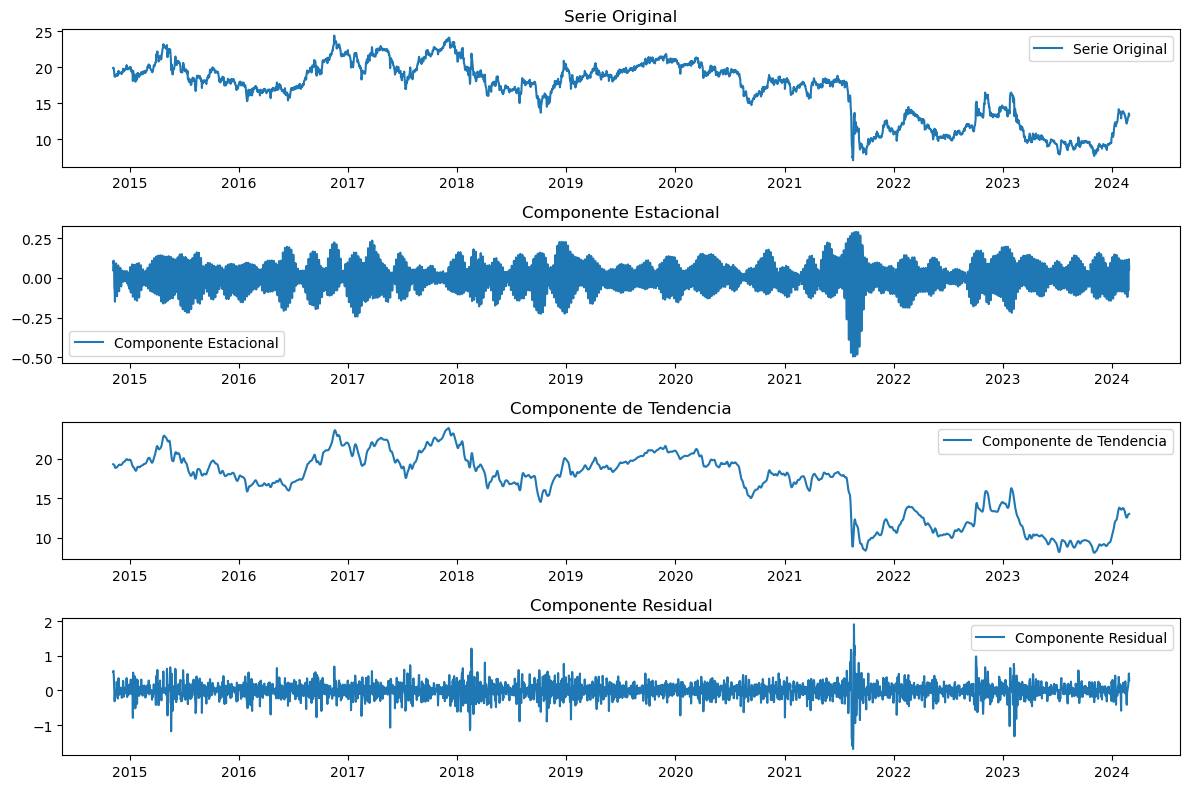

In [24]:
# Graficar la serie original y sus componentes
plt.figure(figsize=(12, 8))

# Gráfico de la serie original
plt.subplot(4, 1, 1)
plt.plot(ARGOS.index, ARGOS['Apertura'], label='Serie Original')
plt.title('Serie Original')
plt.legend()

# Gráfico del componente estacional
plt.subplot(4, 1, 2)
plt.plot(ARGOS.index, stl_result_original.seasonal, label='Componente Estacional')
plt.title('Componente Estacional')
plt.legend()

# Gráfico del componente de tendencia
plt.subplot(4, 1, 3)
plt.plot(ARGOS.index, stl_result_original.trend, label='Componente de Tendencia')
plt.title('Componente de Tendencia')
plt.legend()

# Gráfico del componente residual
plt.subplot(4, 1, 4)
plt.plot(ARGOS.index, stl_result_original.resid, label='Componente Residual')
plt.title('Componente Residual')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
from statsmodels.tsa.seasonal import STL
import pandas as pd
import matplotlib.pyplot as plt

# Ajuste STL a la serie original
stl_result_log = STL(np.log(ARGOS['Apertura']), seasonal=13).fit()

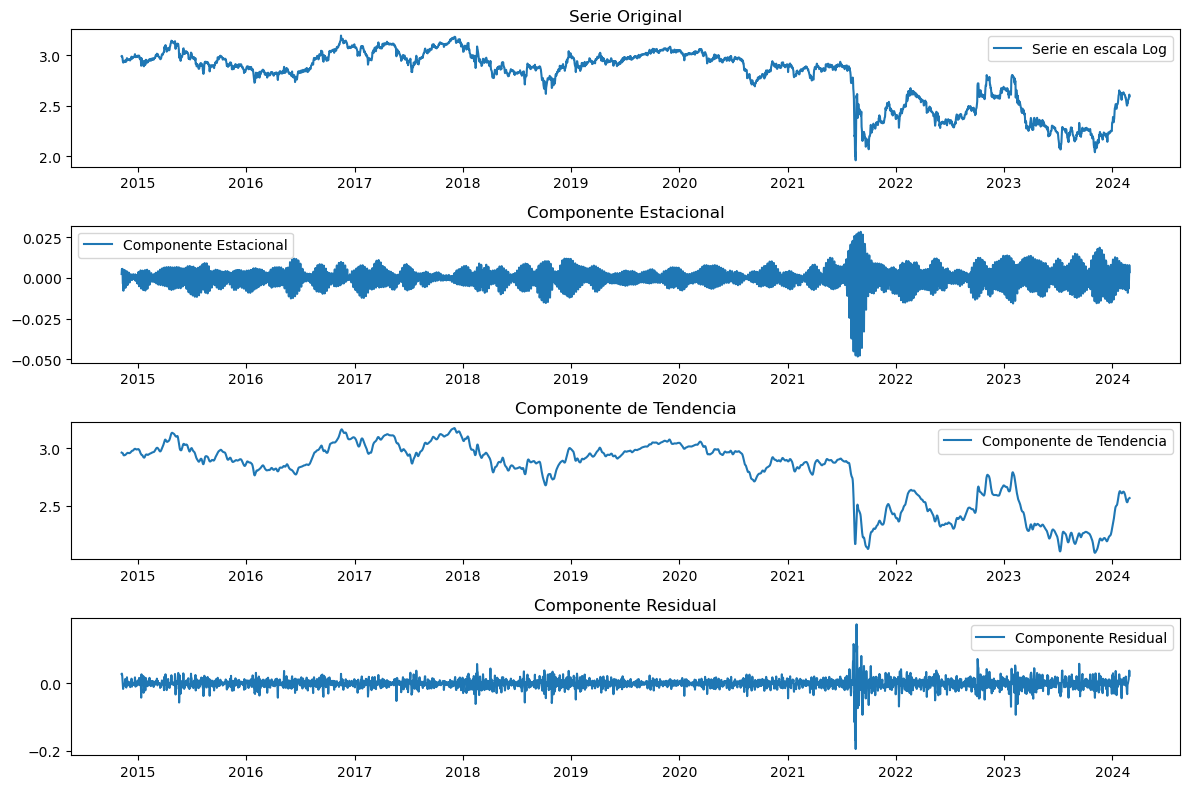

In [26]:
# Graficar la serie original y sus componentes
plt.figure(figsize=(12, 8))

# Gráfico de la serie original
plt.subplot(4, 1, 1)
plt.plot(ARGOS.index, np.log(ARGOS['Apertura']), label='Serie en escala Log')
plt.title('Serie Original')
plt.legend()

# Gráfico del componente estacional
plt.subplot(4, 1, 2)
plt.plot(ARGOS.index, stl_result_log.seasonal, label='Componente Estacional')
plt.title('Componente Estacional')
plt.legend()

# Gráfico del componente de tendencia
plt.subplot(4, 1, 3)
plt.plot(ARGOS.index, stl_result_log.trend, label='Componente de Tendencia')
plt.title('Componente de Tendencia')
plt.legend()

# Gráfico del componente residual
plt.subplot(4, 1, 4)
plt.plot(ARGOS.index, stl_result_log.resid, label='Componente Residual')
plt.title('Componente Residual')
plt.legend()

plt.tight_layout()
plt.show()